# 3-Bit Adder Using Quantum Circuits

## Introduction

In this project, I will show how to add 3 bits using quantum circuits in Qiskit using NOT, CNOT and Toffoli gates. This will include a part of the circuit that encodes the input, a part that executes the algorithm, and a part that extracts the result. The first part will need to be changed whenever we want to use a new input, but the rest will always remain the same.

## 2-Bit Adder

In the [Qiskit online textbook](https://learn.qiskit.org/course/introduction/the-atoms-of-computation), they teach us how to create a quantum circuit that adds 2 bits encoded in the qubits "0" and "1", where the result is a string of 2 bits. We notice that there are fours possible combinations of pairs of bits: $(0,0), (0,1), (1,0), (1,1)$. When we add these bits, the result in binary will be the following:


\begin{array}{|c|c|c|c|}
q_1& q_2 & \text{Second Bit} &\text{First Bit}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
1 & 1 & 1&0\\
1 & 0 & 0&1\\
0 & 1 & 0&1\\
0 & 0 & 0&0\\
\end{array}


To solve this problem, we need to understand how the two resultant bits change based on the values of the first two inputs.

### First bit

\begin{array}{|c |c|c|}
q_1 & q_2 & \text{First Bit}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
1 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 0\\
\end{array}

We can see that the first bit is 1 if and only if there is a "0" and a "1" as our inputs. Note that this truth table represents the [XOR gate](https://en.wikipedia.org/wiki/XOR_gate) (exclusive-or) table of truth, where it returns "1" if the two input values differ.

\begin{array}{|c |c|c|}
q_1 & q_2 & q_1\oplus q_2\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
1 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 0\\
\end{array}

Since we are working with quantum circuits, we will use the [CNOT](https://en.wikipedia.org/wiki/Controlled_NOT_gate) quantum gate, which does the same as the XOR gate. We can start by creating our quantum circuit, applying the CNOT gate to our inputs, storing it in another qubit, and then measuring it as our first resultant qubit.

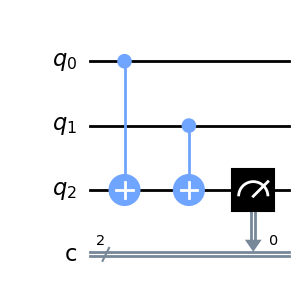

In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator

qc = QuantumCircuit(3,2) # creates the circuit

qc.cx(0,2) 
qc.cx(1,2) # applies the CNOT gate to the two inputs (q0, q1) and stores the result in another qubit q2

qc.measure(2,0) # measures the result in q2, and saves it as our first classical bit (c0)

qc.draw('mpl') # creates a drawing of the quantum circuit


In [2]:
sim = AerSimulator()
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][-1]


'0'

By default, our 2 qubits are set to "0", which is why we got "0" as our classical bit result. We can change their values using a NOT quantum gate and we can see how the result varies.

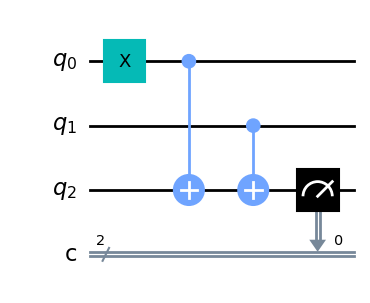

In [3]:
qc = QuantumCircuit(3,2) # creates the circuit

qc.x(0) # changes the q0 state from "0" to "1"
qc.cx(0,2) 
qc.cx(1,2) # applies the CNOT gate to the two inputs (q0, q1) and stores the result in another qubit q2

qc.measure(2,0) # measures the result in q2, and saves it as our first classical bit (c0)

qc.draw('mpl') # creates a drawing of the quantum circuit




In [4]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][-1]

'1'

Now our result is "1", as expected. If we applied the NOT gate to the other qubit instead, it would yield the same result. If both qubits are set to "1", then the measurement will give "0" as expected

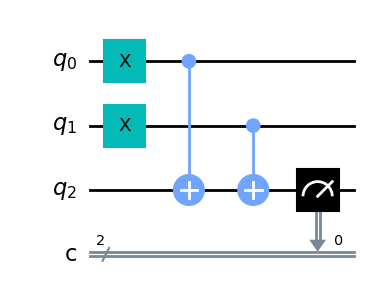

In [5]:
qc = QuantumCircuit(3,2) # creates the circuit

qc.x(0) # changes the q0 state from "0" to "1"
qc.x(1) # changes the q1 state from "0" to "1"

qc.cx(0,2) 
qc.cx(1,2) # applies the CNOT gate to the two inputs (q0, q1) and stores the result in another qubit q2

qc.measure(2,0) # measures the result in q2, and saves it as our first classical bit (c0)

qc.draw('mpl') # creates a drawing of the quantum circuit

In [6]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][-1]

'0'

### Second Bit


\begin{array}{|c|c|c|}
q_1 & q_2 & \text{Second Bit}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
1 & 1 & 1\\
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
\end{array}


We can see that the second bit is "1" if and only if both A and B are "1". This truth table represents the [AND GATE](https://en.wikipedia.org/wiki/AND_gate). Unfortunately, quantum circuits do not use AND/OR gates, since quantum gates need to be reversible; nevertheless, there is a workaround. The [Toffoli Gate](https://en.wikipedia.org/wiki/Toffoli_gate) takes three inputs, and flips the third if and only if the first two are set to "1".

\begin{array}{|c|c|c|c|c|c|}
\text{Input 1} & \text{Input 2} & \text{Input 3} & \text{Output 1} & \text{Output 2} & \text{Output 3}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 1\\\
0 & 1 & 0 & 0 & 1 & 0\\
0 & 1 & 1 & 0 & 1 & 1\\\
1 & 0 & 0 & 1 & 0 & 0\\
1 & 0 & 1 & 1 & 0 & 1 \\
1 & 1 & 0 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 0\\
\end{array}


We can set up our first two inputs as the qubits, and the third input will be an additional qubit set to "0". That way, when both qubits are set to "1", the third qubit will change to "1" too, and we will measure this result as our second classical bit.

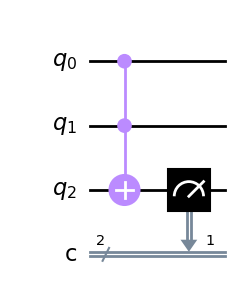

In [7]:
qc = QuantumCircuit(3,2) # creates the circuit
 
qc.ccx(0,1,2) # applies the Toffoli gate to the two inputs (q0, q1) and a third qubit q2 which will store the desired result

qc.measure(2,1) # measures the result in q2, and saves it as our second classical bit (c1)

qc.draw('mpl') # creates a drawing of the quantum circuit

In [8]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][0]

'0'

The result yields "0" as the two qubits are set to "0". If we change their values to "1", the measure will return "1".

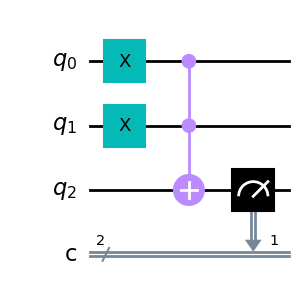

In [9]:
qc = QuantumCircuit(3,2) # creates the circuit

qc.x(0) # changes the q0 state from "0" to "1"
qc.x(1) # changes the q1 state from "0" to "1"
 
qc.ccx(0,1,2) # applies the Toffoli gate to the two inputs (q0, q1) and a third qubit q2 which will store the desired result

qc.measure(2,1) # measures the result in q2, and saves it as our second classical bit (c1)

qc.draw('mpl') # creates a drawing of the quantum circuit

In [10]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][0]

'1'

Now that we were able to get the correct measurements, we can combine the individual circuits which will measure both classical bits simultaneously.

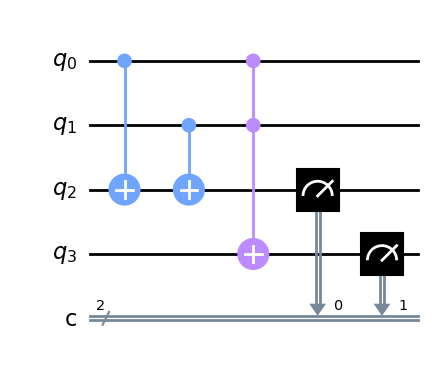

In [11]:
qc = QuantumCircuit(4,2)


qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)

qc.measure(2,0)
qc.measure(3,1)
qc.draw('mpl')

Now that the circuit is done, we can try different values to show that our measurements are correct.

In [12]:
qc = QuantumCircuit(4,2)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0]

'00'

In [13]:
qc = QuantumCircuit(4,2)
qc.x(0) # changes the q0 state from "0" to "1"
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0]

'01'

In [14]:
qc = QuantumCircuit(4,2)
qc.x(1) # changes the q1 state from "0" to "1"
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0]

'01'

In [15]:
qc = QuantumCircuit(4,2)
qc.x(0) # changes the q0 state from "0" to "1"
qc.x(1) # changes the q1 state from "0" to "1"
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0]

'10'

## 3-Bit Adder

Now that we understand how the quantum gates work, it is time to advance to the next level and work with three qubits. This can be more challenging since the order of qubits also matter (for example, we have to make sure that the qubits $(1,1,0)$ give the same result as the qubits $(1,0,1)$ and $(0,1,1)$). When we add these qubits, the measurements of the classical bits will be the following:

\begin{array}{|c|c|c|c|c|}
q_1 & q_2 & q_3 & \text{Second Bit}& \text{First Bit}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 1\\
0 & 1 & 0 & 0 & 1\\
0 & 1 & 1 & 1 & 0\\
1 & 0 & 0 & 0 & 1\\
1 & 0 & 1 & 1 & 0\\
1 & 1 & 0 & 1 & 0\\
1 & 1 & 1 & 1 & 1\\
\end{array}

### First Bit

\begin{array}{|c|c|c|c|}
q_1 & q_2 & q_3 & \text{First Bit}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 0 &  0\\
0 & 0 & 1 &  1\\
0 & 1 & 0 &  1\\
0 & 1 & 1 &  0\\
1 & 0 & 0 & 1\\
1 & 0 & 1 & 0\\
1 & 1 & 0 & 0\\
1 & 1 & 1 & 1\\
\end{array}

From the truth table, we can draw the following conclusion: The first bit will be equal to "1" if and only if the number of qubits set to "1" is odd.

#### Solution

Let's set up a fourth qubit to "0", so that we have two pairs of qubits $$\{(q_0,q_1),(q_2,0)\}$$

The only combinations possible where there is an odd number of qubits set to $1$ (regardless of the order of qubits or pairs) are $$ \{(1,1),(1,0)\} \quad \{(1,0),(0,0)\} $$

They both have something in common: One pair is $(1,0)$ and the other pair is not. By inspection, if we add a CNOT gate to both pairs of qubits, and then add another CNOT gate that takes as inputs the outputs of the two previous CNOT gates, the final result will return $1$ if we have one of the sets of qubits above. This is because the pair $(1,0)$ will return $1$, and the other pair will return $0$, so by using these results as our inputs to the CNOT gate we will get $1$ as our measurement. If the set of pairs is different, it will return $0$ as expected.

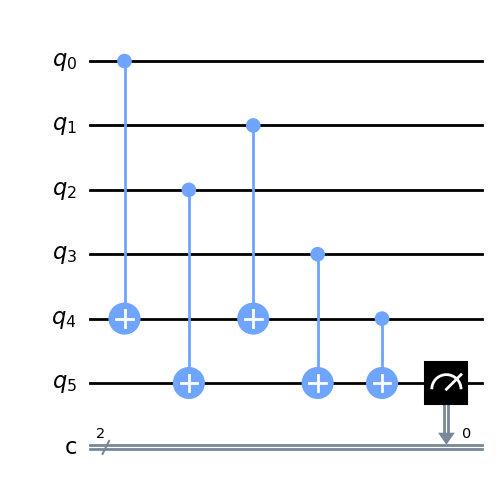

In [18]:
qc = QuantumCircuit(6,2)

qc.cx(0,4)
qc.cx(1,4) ## Applies XOR gate to q0, q1 and stores the result in q4

qc.cx(2,5)
qc.cx(3,5) ## Applies XOR gate to q2, q3 (which is equal to 0) and stores the result in q5

qc.cx(4,5) ## Applies the XOR gate to q4, q5 and stores the result in q5

qc.measure(5,0) ## Measures q5

qc.draw('mpl')

In [19]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][-1]

'0'

Let's try different combinations of qubits to make sure the circuit works fine

In [20]:
qc = QuantumCircuit(6,2)

qc.x(0) ## Sets q0 to 1

qc.cx(0,4)
qc.cx(1,4)

qc.cx(2,5)
qc.cx(3,5) 

qc.cx(4,5) 

qc.measure(5,0) 
job = sim.run(qc)
result = job.result() 
list(result.get_counts())[0][-1]

'1'

In [22]:
qc = QuantumCircuit(6,2)

qc.x(0) ## Sets q0 to 1
qc.x(1) ## Sets q1 to 1

qc.cx(0,4)
qc.cx(1,4)

qc.cx(2,5)
qc.cx(3,5) 

qc.cx(4,5) 

qc.measure(5,0) 
job = sim.run(qc)
result = job.result() 
list(result.get_counts())[0][-1]

'0'

In [23]:
qc = QuantumCircuit(6,2)

qc.x(0) ## Sets q0 to 1
qc.x(1) ## Sets q1 to 1
qc.x(2) ## Sets q2 to 1

qc.cx(0,4)
qc.cx(1,4)

qc.cx(2,5)
qc.cx(3,5) 

qc.cx(4,5) 

qc.measure(5,0) 
job = sim.run(qc)
result = job.result() 
list(result.get_counts())[0][-1]

'1'

In [24]:
qc = QuantumCircuit(6,2)

qc.x(0) ## Sets q0 to 1
qc.x(2) ## Sets q2 to 1

qc.cx(0,4)
qc.cx(1,4)

qc.cx(2,5)
qc.cx(3,5) 

qc.cx(4,5) 

qc.measure(5,0) 
job = sim.run(qc)
result = job.result() 
list(result.get_counts())[0][-1]

'0'

We can observe that when the number of qubits set to $1$ is odd, the measurement gives $1$.